In [1]:
import os
import json
import tqdm
import numpy as np
import pandas as pd
from PIL import Image
from IPython import display

In [2]:
json_path = '/data/PanoHeadData/single_view_hq/dataset_blur.json'
with open(json_path) as f:
    dataset = json.load(f)
print(f'Number of images: {len(dataset)}')

Number of images: 404524


In [19]:
lap_scores = []
svd_scores = []

for blur_meta in tqdm.tqdm(dataset.values()):
    lap_scores.append(blur_meta['laplacian_score'])
    svd_scores.append(blur_meta['svd_score'])

  0%|          | 0/404524 [00:00<?, ?it/s]

100%|██████████| 404524/404524 [00:00<00:00, 2363646.87it/s]


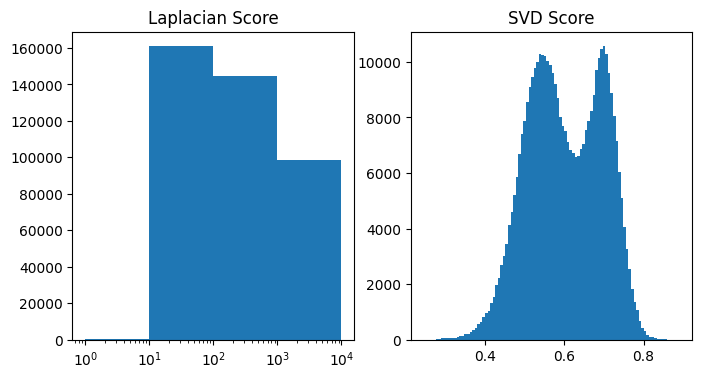

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.xscale('log')
plt.hist(lap_scores, bins=np.logspace(0, 4, 5))
plt.title('Laplacian Score')
plt.subplot(122)
plt.hist(svd_scores, bins=100)
plt.title('SVD Score')
plt.show()

In [20]:
lowest_lap = 100
hightest_lap = -1
lowest_lap_img, hightest_lap_img = None, None
for k, v in dataset.items():
    _lap_score = v['laplacian_score']
    if _lap_score < lowest_lap:
        lowest_lap = _lap_score
        lowest_lap_img = k
    if _lap_score > hightest_lap:
        hightest_lap = _lap_score
        hightest_lap_img = k
print(f'Lowest Laplacian Score: {lowest_lap}')
print(f'Hightest Laplacian Score: {hightest_lap}')
print(f'Lowest Laplacian Score Image: {lowest_lap_img}')
print(f'Hightest Laplacian Score Image: {hightest_lap_img}')

Lowest Laplacian Score: 1.4419768508123887
Hightest Laplacian Score: 14461.749168490449
Lowest Laplacian Score Image: 00073/img00073470.png
Hightest Laplacian Score Image: 00129/img00129574.png


In [3]:
image_path_scores = []
lb_svd = 0.76
hb_svd = 0.85
lb_lap = 10
hb_lap = 40
nums = 20
for k, v in tqdm.tqdm(dataset.items()):
    _lap_score = round(v['laplacian_score'])
    _svd_score = round(v['svd_score'], 2)
    if _lap_score >= lb_lap and _lap_score <= hb_lap:
        image_path_scores.append([os.path.join('/data/PanoHeadData/single_view_hq/align_images', f'{k[:-4]}.jpg'), _svd_score, _lap_score])
        if len(image_path_scores) >= nums:
            break
    # if _svd_score >= lb_svd and _svd_score <= hb_svd:
    #     image_path_scores.append([os.path.join('/data/PanoHeadData/single_view_hq/align_images', f'{k[:-4]}.jpg'), _svd_score, _lap_score])
    #     if len(image_path_scores) >= nums:
    #         break
df = pd.DataFrame(image_path_scores, columns=['image_path', 'svd_score', 'lap_score'])

  9%|▉         | 36025/404524 [00:00<00:00, 803196.85it/s]


In [ ]:
df = df.sort_values(by=['lap_score'], ascending=False)
# df = df.sort_values(by=['svd_score'], ascending=False)
print(df.head(10))
# display images
for i, row in df.iterrows():
    display.display(display.Image(row['image_path']))
    print(row['image_path'], row['svd_score'], row['lap_score'])

In [5]:
orgin_meta_path = '/data/PanoHeadData/single_view_hq/dataset.json'
with open(orgin_meta_path) as f:
    orgin_meta = json.load(f)
both_meta_path = '/data/PanoHeadData/single_view_hq/dataset_blur_lap_50svd_0.75.json'
with open(both_meta_path) as f:
    both_meta = json.load(f)


In [8]:
data_sources = {}

for image_name in tqdm.tqdm(both_meta.keys()):
    image_meta = orgin_meta[image_name]
    src = image_meta['data_source']
    if src not in data_sources:
        data_sources[src] = 0
    data_sources[src] += 1


100%|██████████| 15005/15005 [00:00<00:00, 577236.62it/s]


In [11]:
image_paths = []
vis_samples = 20
for image_name in tqdm.tqdm(both_meta.keys()):
    image_meta = orgin_meta[image_name]
    src = image_meta['data_source']
    if src == 'OCD/Chestnut':
        image_paths.append(os.path.join('/data/PanoHeadData/single_view_hq/align_images', f'{image_name[:-4]}.jpg'))
        vis_samples -= 1
    if vis_samples <= 0:
        break

  5%|▌         | 759/15005 [00:00<00:00, 351299.57it/s]


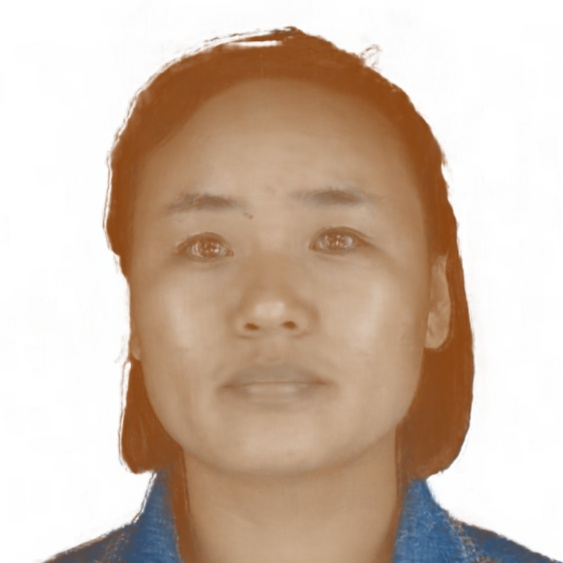

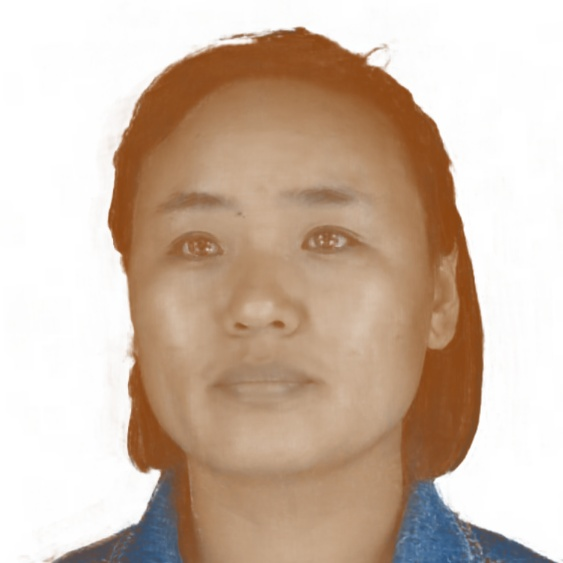

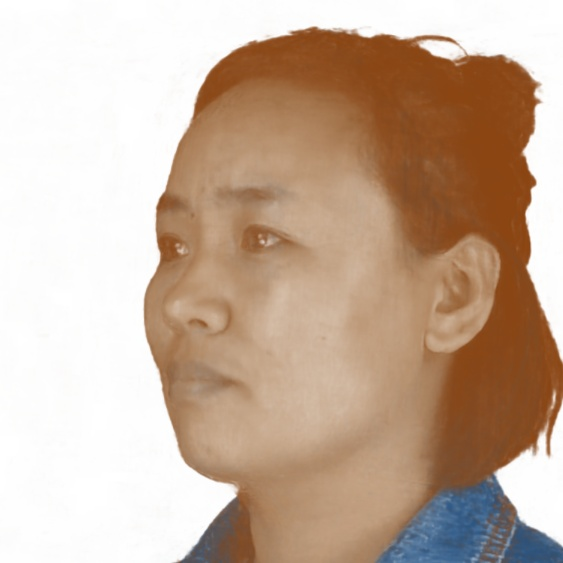

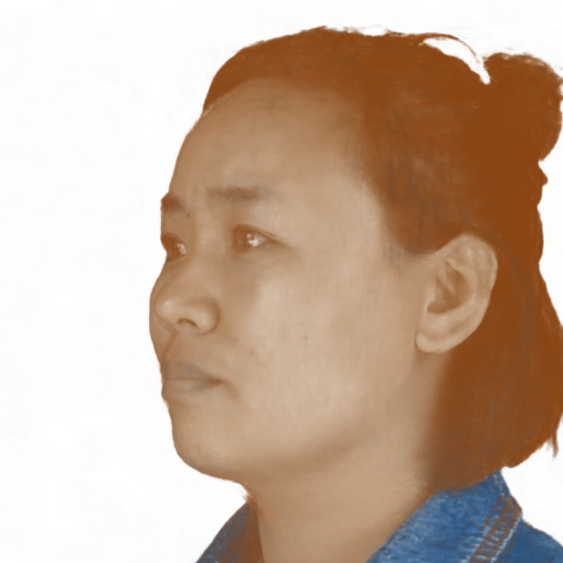

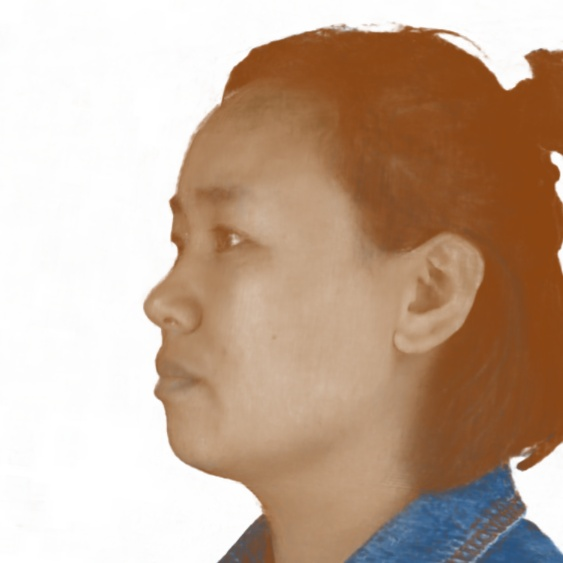

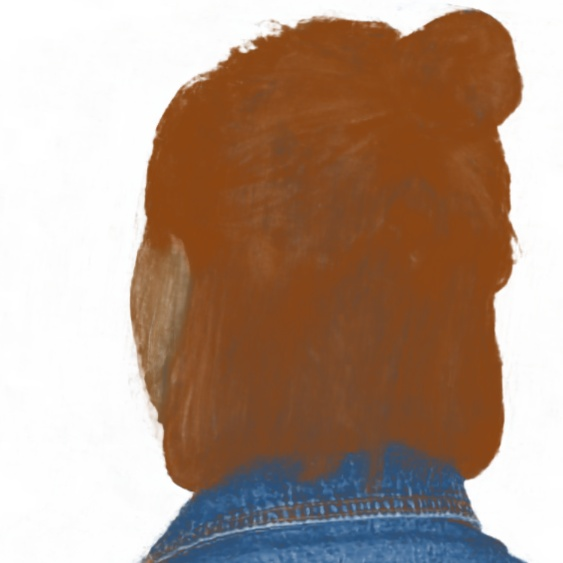

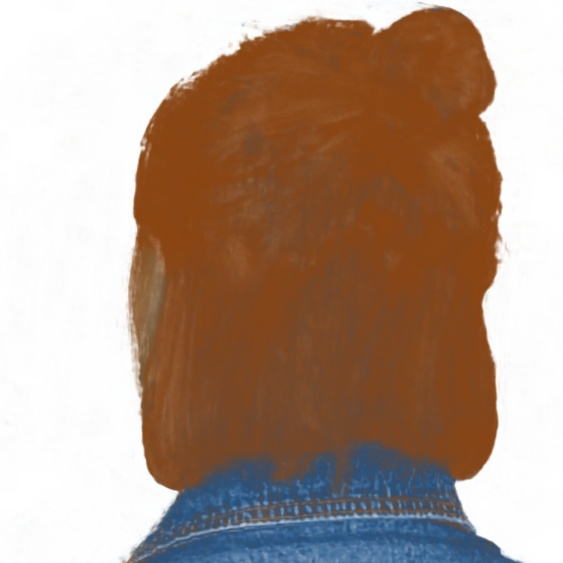

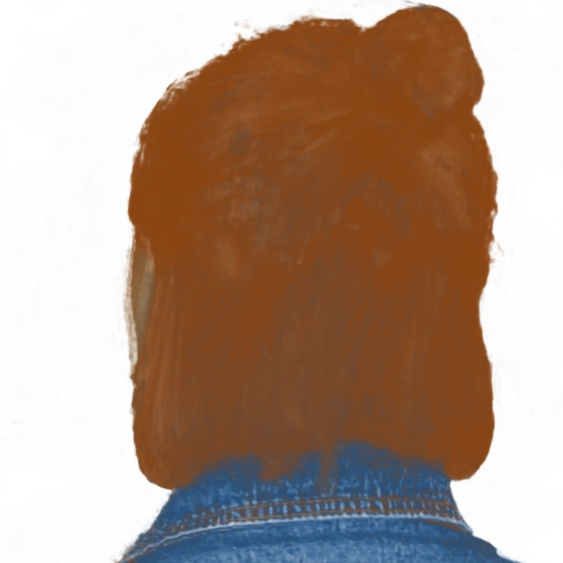

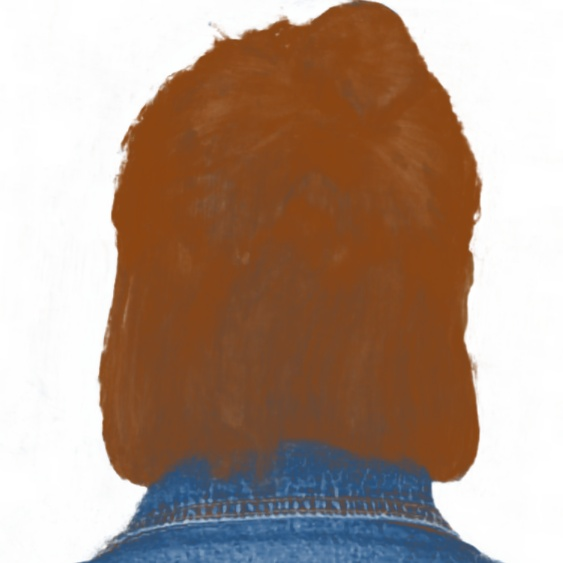

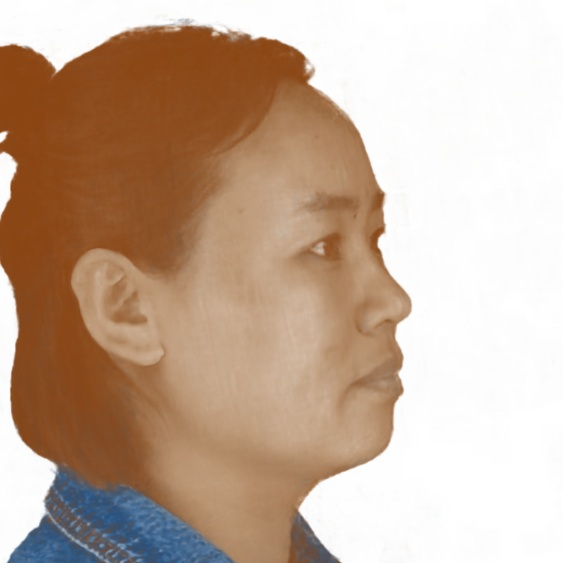

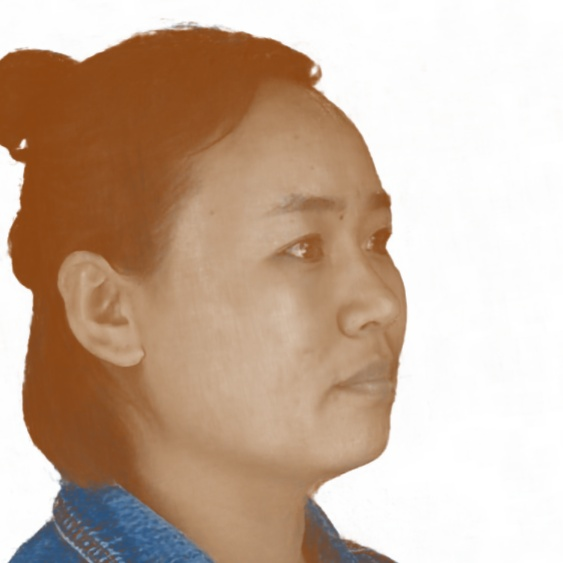

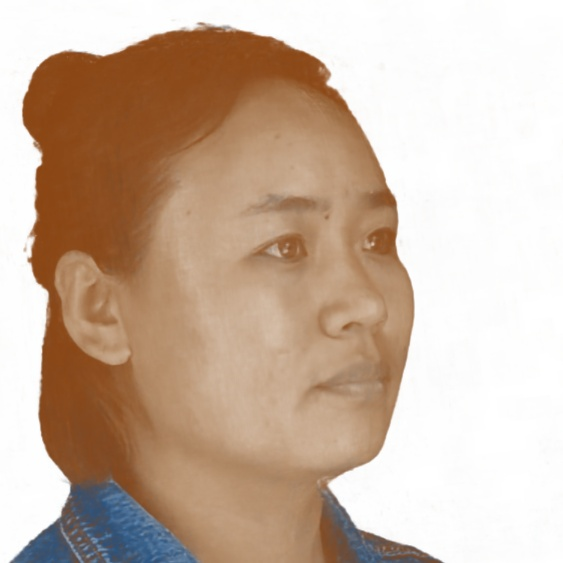

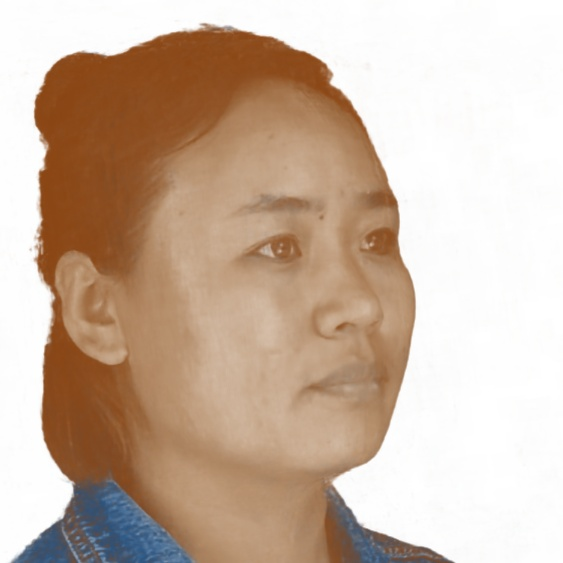

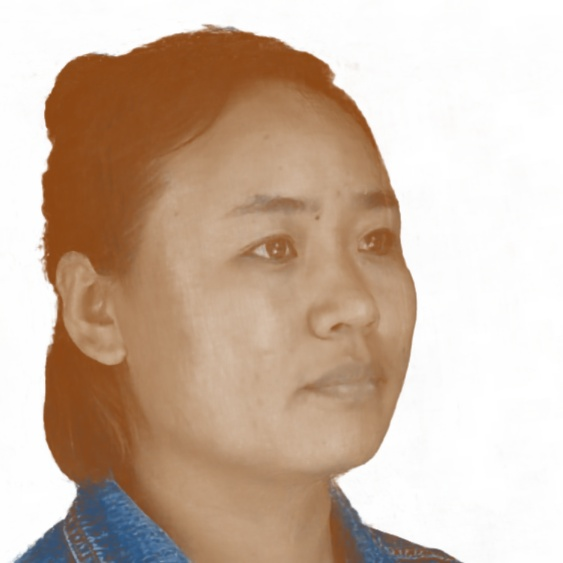

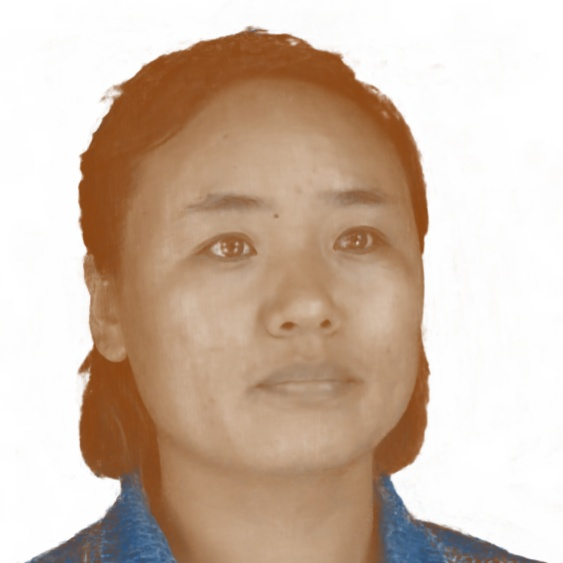

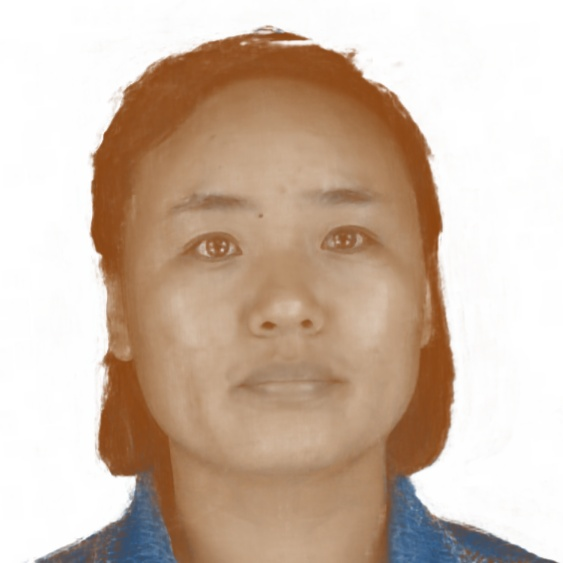

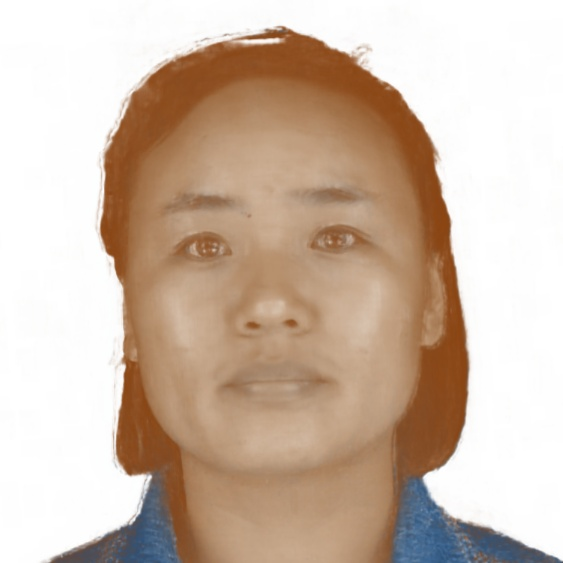

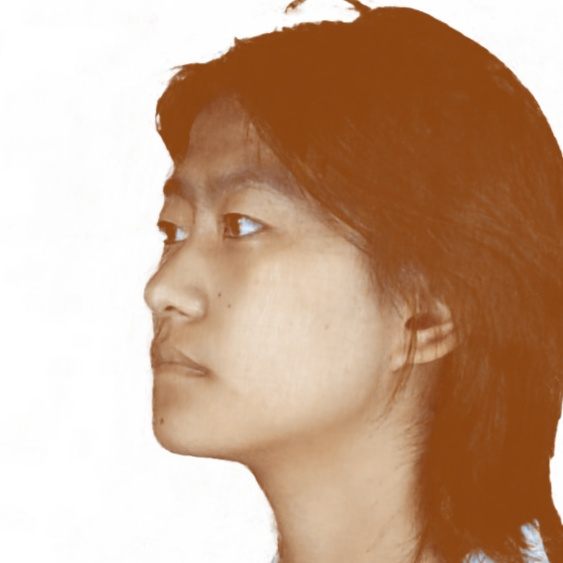

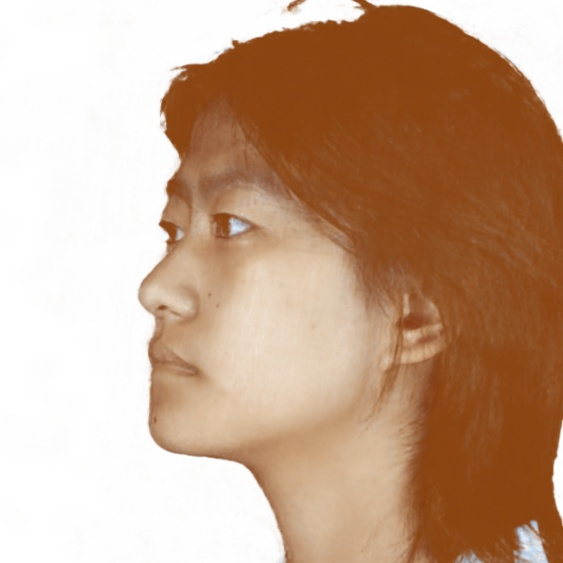

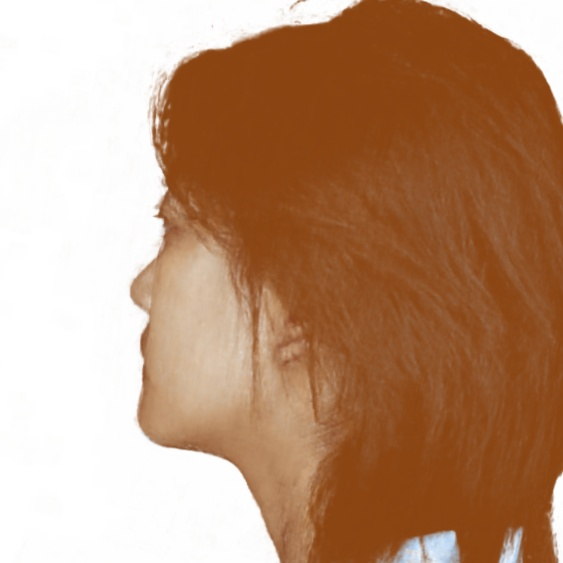

In [12]:
for ip in image_paths:
    display.display(display.Image(ip))